In [5]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from collections import defaultdict

sns.set()

In [6]:
languages_df = pd.read_csv("languages.csv").drop(columns=['Unnamed: 1'])
languages_df.head(10)

,name,language
0,albacore,Python
1,anchovy,Python
2,carpetshark,Python
3,emperor,Python
4,icarfish,Python
5,snapper,Java
6,torpedo,Python
7,whitebait,Python
8,zingel,Python


In [7]:
languages_df = languages_df['language'].value_counts().to_frame().reset_index().rename(columns={'index': 'languages', 'language': 'count'})[:10]
languages_df.head(10)

,languages,count
0,Python,8
1,Java,1


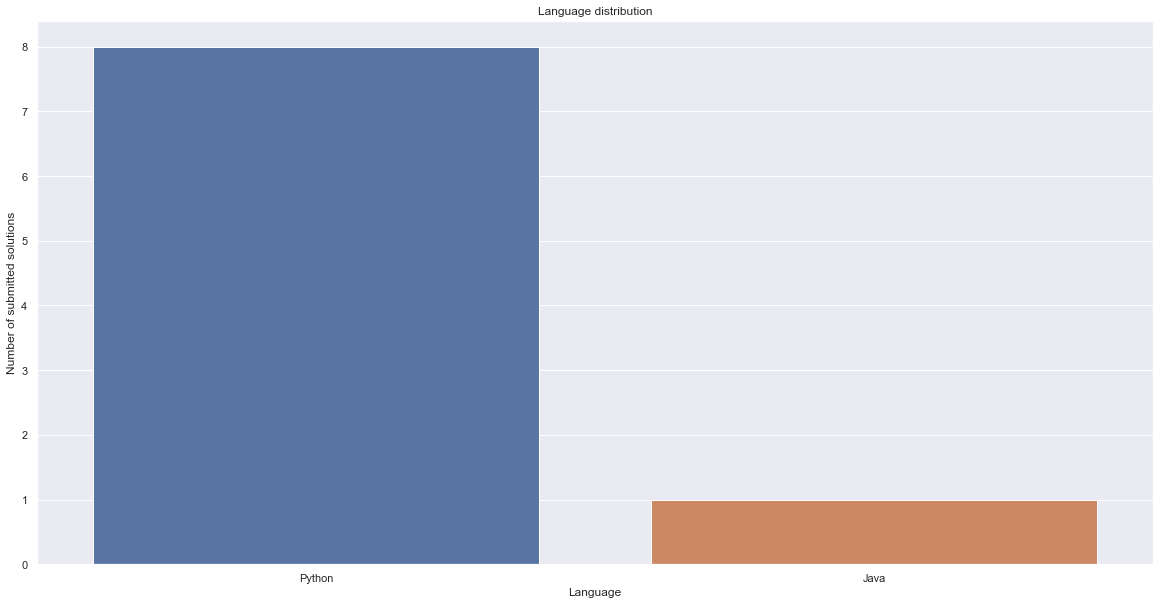

In [8]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data=languages_df, x='languages', y='count', orient='v')
ax.set_title('Language distribution')
ax.set_xlabel('Language')
ax.set_ylabel('Number of submitted solutions')
plt.show()

In [9]:
imports_df = pd.read_csv('imports.csv').drop(columns=["Unnamed: 0"])
imports_df.head()

,imports
0,"__future__, sklearn.model_slection, numpy, os,..."
1,"json, sys, sklearn.metrics, numpy, tensorflow,..."
2,"re, json, pickle, os, sys, itertools, numpy, p..."
3,"json, random, sklearn.preprocessing, numpy, sc..."
4,"numpy, sklearn, sklearn.metrics, sklearn.linea..."


In [10]:
def convert(s):
    return list(s.split(", "))

In [11]:
imports_df['imports'] = imports_df['imports'].apply(convert)  # pandas messes with lists when converting to/from CSV
imports_df['num_imports'] = imports_df['imports'].apply(len)
imports_df.head()

,imports,num_imports
0,"[__future__, sklearn.model_slection, numpy, os...",18
1,"[json, sys, sklearn.metrics, numpy, tensorflow...",15
2,"[re, json, pickle, os, sys, itertools, numpy, ...",14
3,"[json, random, sklearn.preprocessing, numpy, s...",24
4,"[numpy, sklearn, sklearn.metrics, sklearn.line...",33


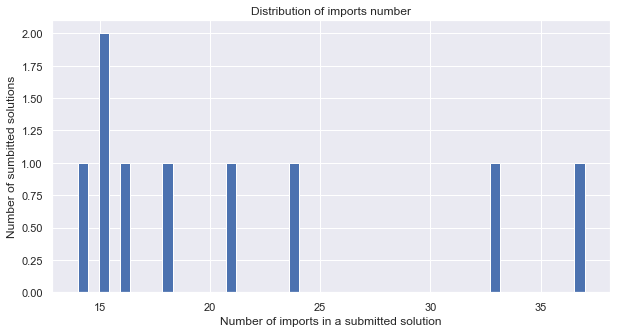

In [12]:
plt.figure(figsize=(10,5))
plt.hist(imports_df[imports_df['num_imports'] != 0][imports_df['num_imports'] < 50]['num_imports'],
         bins=48, density=False, log=False)
plt.title('Distribution of imports number')
plt.xlabel('Number of imports in a submitted solution')
plt.ylabel('Number of sumbitted solutions')
plt.show()

In [13]:
imports_df.drop(columns=['num_imports'], inplace=True)

In [14]:
imports_count = defaultdict(int)
for imports in imports_df['imports']:
    imports = set(lib.split('.')[0] for lib in imports)
    for lib in imports:
        imports_count[lib] = imports_count.get(lib, 0) + 1

In [15]:
sorted_imports_count = sorted(imports_count.items(), key=lambda itm: itm[1], reverse=True)
frequent_imports = list(x[0] for x in sorted_imports_count)
print(f'Got {len(sorted_imports_count)} unique libraries')

Got 56 unique libraries


In [16]:
sorted_imports_count = pd.DataFrame(sorted_imports_count, columns=['library', 'count'])

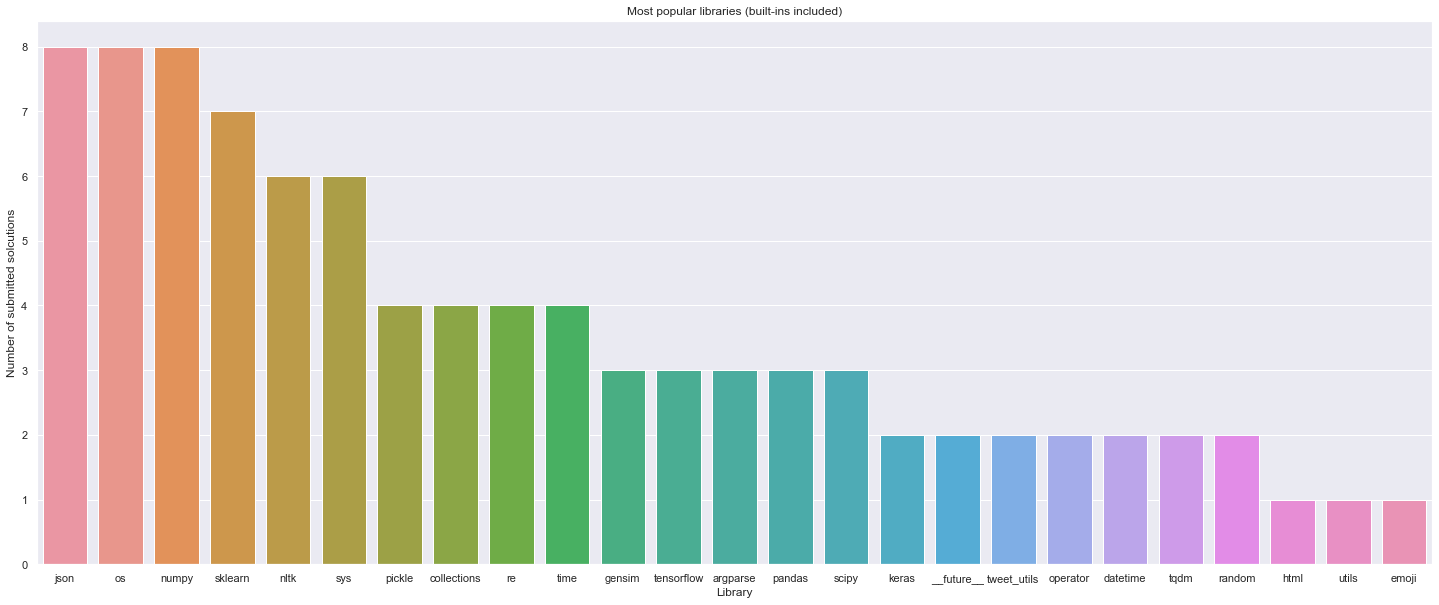

In [17]:
plt.figure(figsize=(25,10))
ax = sns.barplot(data=sorted_imports_count[:25], x='library', y='count', orient='v')
ax.set_title('Most popular libraries (built-ins included)')
ax.set_xlabel('Library')
ax.set_ylabel('Number of submitted solcutions')
plt.show()